# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [62]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [64]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,643,95,43,83,198,69,6,177,36,21,139,189,484,163,68,6,4,196,198
1,573,89,47,80,131,54,11,160,43,20,163,175,369,174,77,1,7,182,193
2,407,91,38,75,136,53,6,144,47,19,131,165,305,149,69,1,7,186,191
3,6,97,43,73,173,65,6,153,42,19,143,176,361,172,66,13,1,200,204
4,479,86,42,64,122,54,6,148,46,19,143,170,319,171,87,1,3,179,182
5,160,82,38,53,125,59,5,133,51,18,128,152,259,146,87,0,0,177,183
6,826,95,49,92,193,62,10,178,37,21,154,200,478,171,64,2,0,198,206
7,49,91,45,79,176,59,9,163,40,20,148,184,404,179,62,0,10,199,208
8,683,110,56,109,199,57,5,251,27,27,169,272,928,268,82,11,10,183,183
9,808,83,46,68,139,59,6,150,44,19,146,172,336,183,74,5,3,185,191


Methods `describe` and `info` deliver some useful information.

In [65]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,430.519126,93.484517,44.612022,81.531876,167.125683,61.207650,8.207650,167.748634,41.216758,20.508197,147.387978,187.162113,433.958106,173.706740,72.331512,6.510018,12.648452,188.723133,195.418944
std,244.867881,8.305429,6.209300,15.775147,31.998413,5.757624,2.769202,32.965679,7.823463,2.565639,14.585662,30.554265,174.681358,32.521688,6.442852,5.120304,8.969652,6.134430,7.462270
min,0.000000,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,182.000000
25%,215.000000,87.000000,39.000000,70.000000,140.000000,57.000000,7.000000,146.000000,34.000000,19.000000,136.000000,167.000000,317.000000,148.000000,68.000000,2.000000,5.000000,184.000000,190.000000
50%,435.000000,92.000000,44.000000,80.000000,165.000000,61.000000,8.000000,156.000000,43.000000,20.000000,145.000000,177.000000,362.000000,172.000000,72.000000,5.000000,11.000000,188.000000,196.000000
75%,645.000000,100.000000,49.000000,96.000000,194.000000,65.000000,10.000000,195.000000,46.000000,22.000000,159.000000,215.000000,573.000000,197.000000,75.000000,10.000000,19.000000,193.000000,201.000000
max,843.000000,119.000000,59.000000,110.000000,246.000000,97.000000,46.000000,265.000000,61.000000,29.000000,188.000000,287.000000,1018.000000,268.000000,91.000000,22.000000,40.000000,206.000000,211.000000


In [66]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [67]:
from sklearn.preprocessing import StandardScaler

# We need to scale dataset to have mean 0 and std 1
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

X_train_pd = pd.DataFrame(X_train)
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02
mean,0.000000,-3.753322e-16,4.691653e-16,-1.310427e-16,2.556142e-16,-5.905011e-16,9.383306e-17,3.623897e-16,1.941374e-17,4.012172e-16,7.894919e-16,-2.103155e-16,-1.229537e-16,-2.814992e-16,1.062902e-15,-9.545087e-17,1.100112e-16,2.276261e-15,-1.466546e-15
std,1.000912,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00
min,-1.759772,-2.468650e+00,-1.871807e+00,-2.635142e+00,-1.974575e+00,-2.469874e+00,-2.243719e+00,-1.692654e+00,-1.946789e+00,-1.368624e+00,-2.016691e+00,-1.872545e+00,-1.432243e+00,-1.991463e+00,-2.071081e+00,-1.272572e+00,-1.411425e+00,-2.075944e+00,-1.799879e+00
25%,-0.880947,-7.814685e-01,-9.046334e-01,-7.316821e-01,-8.484928e-01,-7.314628e-01,-4.364981e-01,-6.603373e-01,-9.232918e-01,-5.883805e-01,-7.814773e-01,-6.604807e-01,-6.701618e-01,-7.911700e-01,-6.729104e-01,-8.816140e-01,-8.534810e-01,-7.706405e-01,-7.268412e-01
50%,0.018316,-1.789036e-01,-9.865525e-02,-9.719549e-02,-6.649148e-02,-3.609816e-02,-7.505398e-02,-3.567149e-01,2.281430e-01,-1.982586e-01,-1.638702e-01,-3.328956e-01,-4.123149e-01,-5.252790e-02,-5.150114e-02,-2.951769e-01,-1.839486e-01,-1.179885e-01,7.793692e-02
75%,0.876703,7.852003e-01,7.073229e-01,9.179831e-01,8.406300e-01,6.592665e-01,6.478343e-01,8.274126e-01,6.119546e-01,5.819851e-01,7.968519e-01,9.119275e-01,7.967004e-01,7.168909e-01,4.145558e-01,6.822183e-01,7.087612e-01,6.978264e-01,7.485854e-01
max,1.686040,3.074947e+00,2.319279e+00,1.806264e+00,2.467193e+00,6.222183e+00,1.365982e+01,2.952770e+00,2.531013e+00,3.312838e+00,2.786919e+00,3.270540e+00,3.346519e+00,2.902040e+00,2.900193e+00,3.027967e+00,3.052124e+00,2.818945e+00,2.089882e+00


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection  import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

# We need to find best parametrs using GridSearch
logreg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=1000)
param_grid = {'C': [0.01, 0.1, 1, 5, 10, 50, 100], 'penalty': ['l1', 'l2']}
logreg_model = GridSearchCV(logreg, param_grid)
logreg_model.fit(X_train, y_train)

print("best parameters: ", logreg_model.best_params_)

best parameters:  {'C': 10, 'penalty': 'l2'}


In [69]:
# Build model with best parametrs
logreg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500,
                            C=logreg_model.best_params_['C'],
                            penalty=logreg_model.best_params_['penalty'])
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)

print("accuracy: ", accuracy_score(y_test, pred))
print("f1: ", f1_score(y_test, pred, average="macro"))

accuracy:  0.7878787878787878
f1:  0.7817497868712703


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

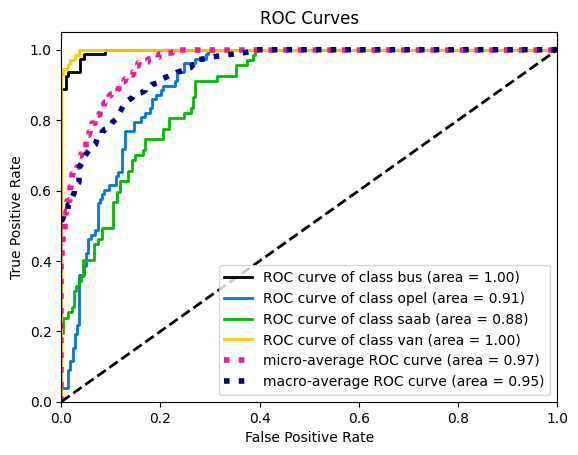

In [70]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

import scikitplot as skplt

y_pred = logreg.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

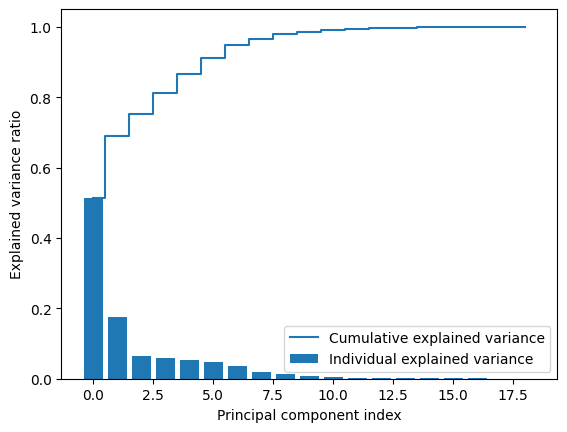

In [71]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(X_train)
pca_ratio = pca.explained_variance_ratio_

x_items = range(len(pca_ratio))
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.step(x_items, np.cumsum(pca_ratio), where='mid', label='Cumulative explained variance')
plt.bar(x_items, pca_ratio, label='Individual explained variance')
plt.legend(loc='best')
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [72]:
# Pricipal component index ~= 11 from the graph
pca = PCA(n_components=11)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [73]:
logreg_pca = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
param_grid = {'C': [0.01, 0.1, 1, 5, 10, 50, 100], 'penalty': ['l1', 'l2']}
pca_model = GridSearchCV(logreg_pca, param_grid)
pca_model.fit(X_train_pca, y_train)

print("best parameters: ", pca_model.best_params_)

best parameters:  {'C': 0.1, 'penalty': 'l2'}


In [74]:
# Build model with best parameters from PCA
logreg_pca = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500,
                                C=pca_model.best_params_['C'],
                                penalty=pca_model.best_params_['penalty'])
logreg_pca.fit(X_train_pca, y_train)
pred = logreg_pca.predict(X_test_pca)

print("accuracy: ", accuracy_score(y_test, pred))
print("f1: ", f1_score(y_test, pred, average="macro"))

accuracy:  0.7272727272727273
f1:  0.7105394246146892


##### Here we can see a little degradation of accuracy due to PCA, but it works much faster because we use fewer components

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

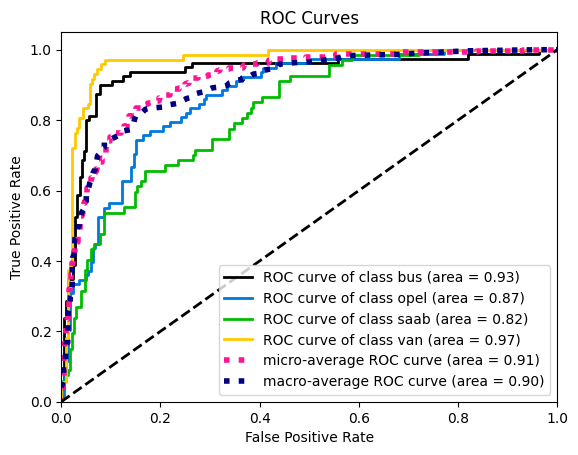

In [75]:
y_pred = logreg_pca.predict_proba(X_test_pca)
skplt.metrics.plot_roc(y_test, y_pred)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [76]:
from sklearn.tree import DecisionTreeClassifier

grid_param = {'max_depth': np.arange(1, 15)}
tree_clf = DecisionTreeClassifier()
dec_tree = GridSearchCV(tree_clf, grid_param)

dec_tree.fit(X_train_pca, y_train)

print("best parameters: ", dec_tree.best_params_)

best parameters:  {'max_depth': 10}


In [77]:
# Build model with best parameters from decision tree classifier
tree_clf = DecisionTreeClassifier(max_depth=dec_tree.best_params_['max_depth'])
tree_clf.fit(X_train_pca, y_train)
pred = tree_clf.predict(X_test_pca)

print("accuracy: ", accuracy_score(y_test, pred))
print("f1: ", f1_score(y_test, pred, average='macro'))

accuracy:  0.5993265993265994
f1:  0.5975026585647852


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

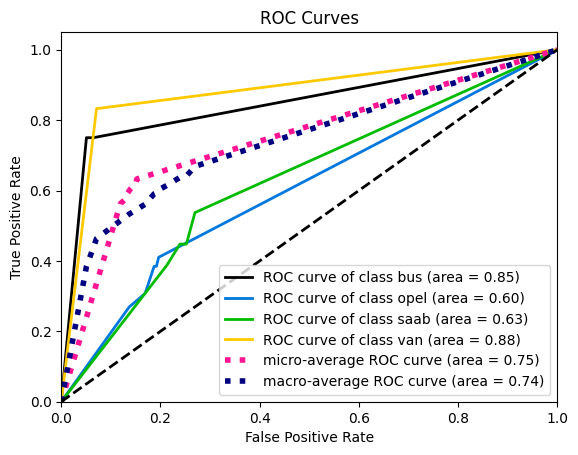

In [78]:
y_pred = tree_clf.predict_proba(X_test_pca)
skplt.metrics.plot_roc(y_test, y_pred)

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:

from sklearn.ensemble import BaggingClassifier

def plot_bagging(n_estimators, means, title):
    plt.plot(n_estimators, means)
    plt.title(f'Dependency of {title} on estimators')
    plt.xlabel('Estimators')
    plt.ylabel(f'{title}')
    plt.show()

def bagging_ensemble(estimator):
    bagging_clf = BaggingClassifier(estimator=estimator)
    grid = {'n_estimators': np.linspace(2, 97, num=20, dtype=int)}
    grid_search = GridSearchCV(estimator=bagging_clf, param_grid=grid, scoring='accuracy', error_score=0)
    fited = grid_search.fit(X_train, y_train)
    means = fited.cv_results_['mean_test_score']
    plot_bagging(grid['n_estimators'], means, 'accuracy')
    print("best parameters: ", fited.best_params_)

    grid_search = GridSearchCV(estimator=bagging_clf, param_grid=grid, scoring='f1_weighted', error_score=0)
    fited = grid_search.fit(X_train, y_train)
    means = fited.cv_results_['mean_test_score']
    plot_bagging(grid['n_estimators'], means, 'f1')
    print("best parameters: ", fited.best_params_)


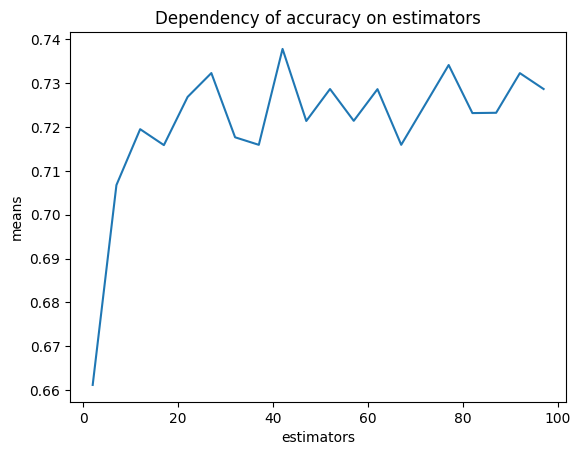

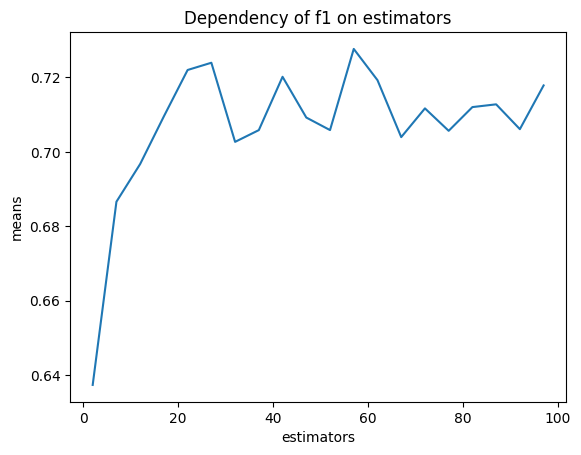

In [207]:
bagging_ensemble(DecisionTreeClassifier(max_depth=10))

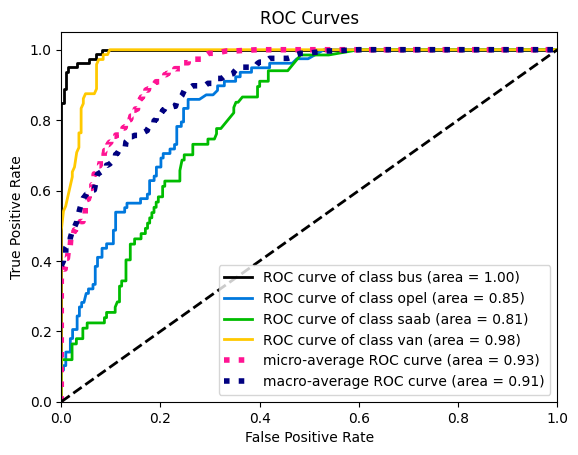

In [208]:
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10),
                                n_estimators=40)
bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred)
plt.show()

/home/ivan/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ivan/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ivan/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ivan/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ivan/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


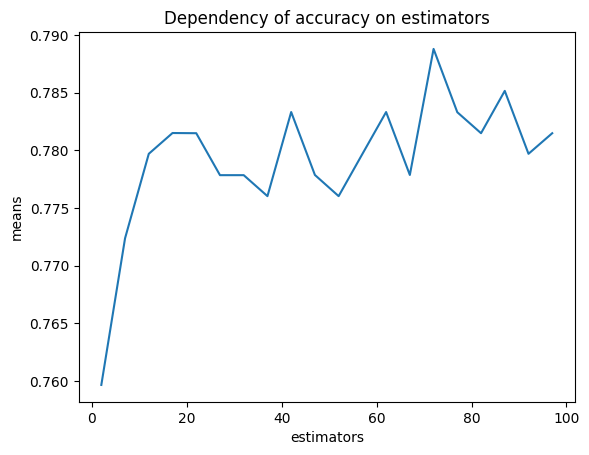

/home/ivan/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ivan/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ivan/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ivan/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ivan/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ivan/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: Convergen

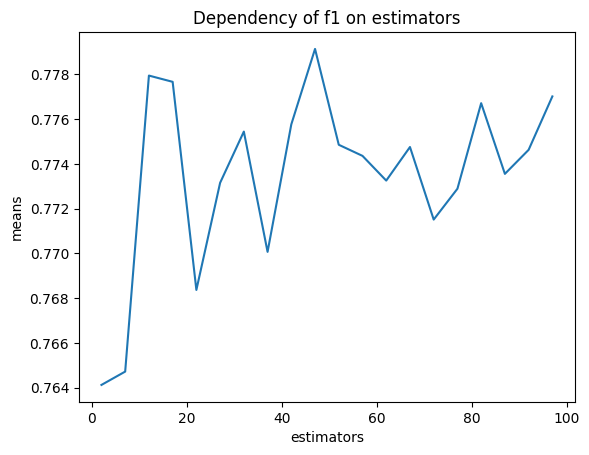

In [209]:
bagging_ensemble(LogisticRegression(max_iter=500, multi_class='multinomial', solver='saga', tol=1e-3, C=10, penalty='l2'))

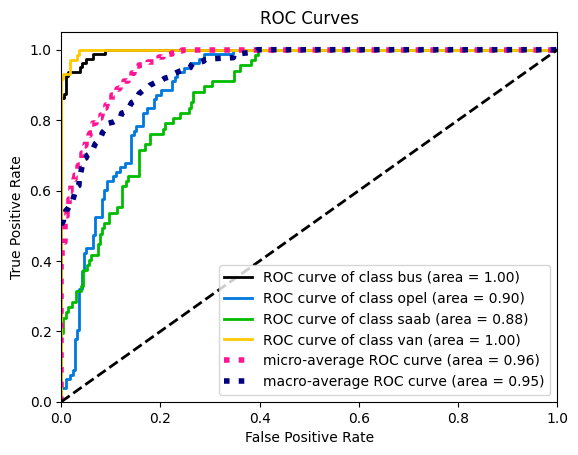

In [211]:
model = BaggingClassifier(estimator=LogisticRegression(max_iter=500, multi_class='multinomial', solver='saga', tol=1e-3, C=10, penalty='l2'),
                          n_estimators=40)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred)
plt.show()

Trees are good in ensembles, they are easily retrained and by themselves strongly depend on the sample, so the more trees are built from samples, the better they reflect the general patterns of the data. For trees, we can take 80 samples, but for logreg this is not so relevant, we can take about 40.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

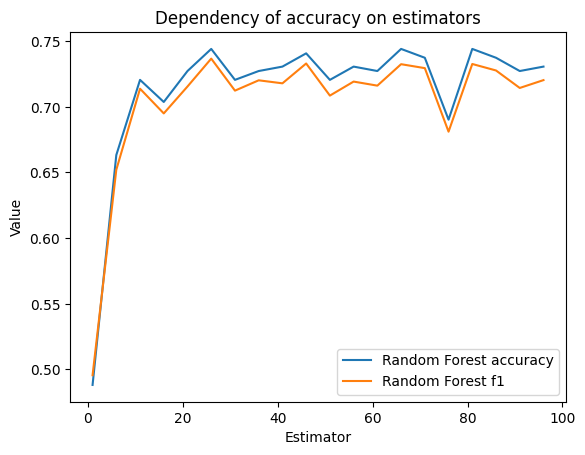

In [97]:
from sklearn.ensemble import RandomForestClassifier

estimators = np.arange(1, 100, 5)
forest_accuracies = []
forest_f1 = []

for estimator in estimators:
    model = RandomForestClassifier(n_estimators=estimator)
    model.fit(X_train_pca, y_train)
    pred = model.predict(X_test_pca)
    forest_accuracies.append(accuracy_score(y_test, pred))
    forest_f1.append(f1_score(y_test, pred, average='macro'))

plt.title('Dependency of accuracy on estimators')
plt.plot(estimators, forest_accuracies, label='Random Forest accuracy')
plt.plot(estimators, forest_f1, label='Random Forest f1')
plt.xlabel("Estimator")
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

Optimal number of trees is about 40. Then graph reaches assymptote and score degradates a little bit. But in general plot is similar to the tree plot in bagging

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

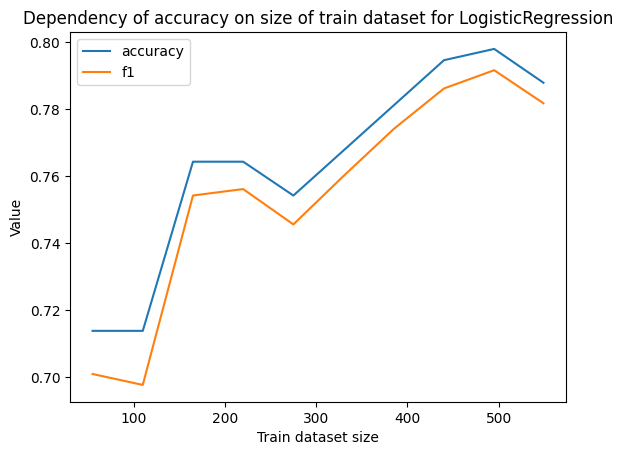

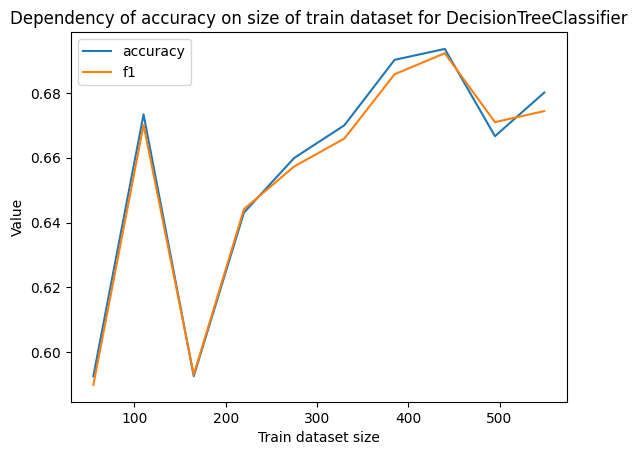

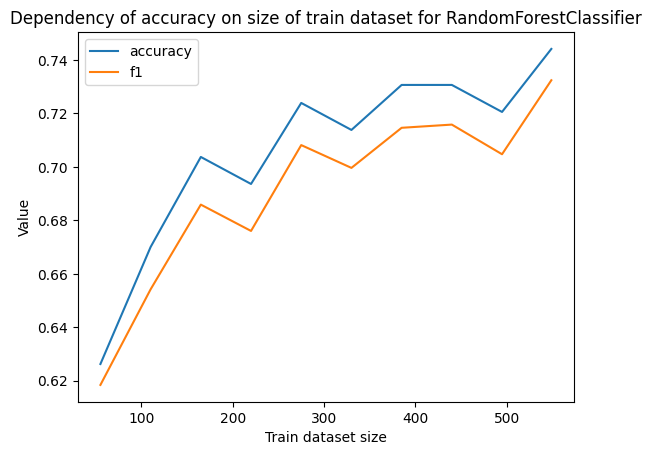

In [159]:
from sklearn.model_selection import StratifiedKFold

def plot_classifier_accuracy(classifier, classifier_name):
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=True)

    train_idx = []
    x_items = []

    accuracy = []
    clf_f1 = []
    for _, test_idx in skf.split(X_train, y_train):
        train_idx.extend(test_idx)
        classifier.fit(X_train[train_idx], y_train[train_idx])
        x_items.append(len(train_idx))
        pred = classifier.predict(X_test)
        accuracy.append(accuracy_score(y_test, pred))
        clf_f1.append(f1_score(y_test, pred, average='macro'))

    plt.title(f'Dependency of accuracy on size of train dataset for {classifier_name}')
    plt.plot(x_items, accuracy, label='accuracy')
    plt.plot(x_items, clf_f1, label='f1')
    plt.xlabel("Train dataset size")
    plt.ylabel('Value')
    plt.legend(loc='best')
    plt.show()

log_reg_best_params = logreg_model.best_params_
dec_tree_best_params = dec_tree.best_params_
rnd_forest_best_params = {'n_estimators': 40}

logreg_clf = LogisticRegression(tol=1e-3, solver='saga', max_iter=500, multi_class='multinomial',
                                C=log_reg_best_params['C'],
                                penalty=log_reg_best_params['penalty'])
plot_classifier_accuracy(logreg_clf, 'LogisticRegression')

dectree_clf = DecisionTreeClassifier(max_depth=dec_tree_best_params['max_depth'])
plot_classifier_accuracy(dectree_clf, 'DecisionTreeClassifier')

forest_clf = RandomForestClassifier(n_estimators=rnd_forest_best_params['n_estimators'])
plot_classifier_accuracy(forest_clf, 'RandomForestClassifier')

As we can see from the graph, the accuracy increases as the size of the dataset increases, but there is also some degradation at 400 size

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

In [125]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

encoder = LabelEncoder()
encoded_y_train = encoder.fit_transform(y_train)

xgb_clf = xgb.XGBClassifier()
grid_param = {'n_estimators': np.arange(1, 100, 5)}
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=True)
grid_search = GridSearchCV(xgb_clf, grid_param, scoring="accuracy", cv=kfold)
grid_search.fit(X_train, encoded_y_train)

print("best parameters: ", grid_search.best_params_)

best parameters: {'n_estimators': 41}


In [127]:
xgb_clf = xgb.XGBClassifier(n_estimators=grid_search.best_params_['n_estimators'])
xgb_clf.fit(X_train, encoded_y_train)
pred = encoder.inverse_transform(xgb_clf.predict(X_test))

print("accuracy: ", accuracy_score(y_test, pred))
print("f1: ", f1_score(y_test, pred, average='macro'))

accuracy:  0.7171717171717171
f1:  0.708423893047937


Optimal number of decision trees is 41 on grid search and it is very similar to bagging optimal number